In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

def bubble(x, amp, cen1, cen2, offset, wid1, wid2):
    return -amp*( np.arctan((x-cen1)/wid1)/(np.pi/2) - np.arctan((x-cen2)/wid2)/(np.pi/2)-1) + offset

def gauss(x, amp, cen1, wid1, offset):
    return -amp*(np.exp(-(x-cen1)**2/2/wid1**2)) + offset

def bubbleshoulder(x, amp, cen1, offset, wid1):
    return -amp*(np.arctan((x-cen1)/wid1))/(np.pi/2) + offset

In [2]:
f = [r"Bolle/08/seq_89.hdf", # database del giorno
     r"Bolle/08/seq_2.hdf",
     r"Bolle/08/seq_8.hdf",
     r"Bolle/11_14/seq_1.hdf",
     r"Bolle/11_11/seq_1.hdf",
     r"Bolle/11_25/seq_1.hdf",
     r"Bolle/11_29/seq_1.hdf",
     r"Bolle/11_30/seq_1.hdf",
     r"Bolle/01_13/seq_1.hdf",
     r"Bolle/01_16/seq_1.hdf",
     r"Bolle/01_17/seq_1.hdf",
     r"Bolle/01_19/seq_1.hdf",
     r"Bolle/01_24/seq_1.hdf"]


seqs = [[[5],[6],[7],[8]], #sequenze utile del giorno tot
        [[8],[9],[10]],
        [[10],[14]],
        [[9],[18,21,24,25]],
        [[24,25,26],[28,29,30],[31],[32,33],[34],[35],[37,38]],
        [[12,14,20,24],[23,25],[21,26],[22,27],[10]],
        [[5],[6],[8],[9,10],[33,39,48],[45]],
        [[9],[10,18,19,20],[11],[13]],
        [[12,13,17,18],[14,15,19,25,27,26]],
        [[12],[13,14]],
        [[33,34]],
        [[15],[16],[17,18]],
        [[22,23,29,30],[24,25]]]

Conv=2700

Ref2=0.326
Ref2b=0.335
Ref3=0.145
Ref4=0.345
Ref5=0.39
Ref6=0.31
Ref7=0.335
Ref8=0.207
Ref9=0.22
        

HystEnd=[[0.2,0.2,0.2,0.2], #400
         [0.225,0.225,0.225], #400
         [0.245,0.245], #400
         [Ref2,Ref2], #600
         [Ref2b,Ref2b,Ref2b,Ref2b,Ref2b,Ref2b,Ref2b], #600
         [Ref3,Ref3,Ref3,Ref3,Ref3], #200
         [Ref4,Ref4,Ref4,Ref4,0.405,0.405], #800
         [Ref5,Ref5,Ref5,Ref5], #800
         [Ref6,Ref6], #600 2023
         [Ref6,Ref6],
         [Ref7], #600 2023
         [Ref8,Ref8,Ref8],
         [Ref9,Ref9]] #300 2023

Offset=[[0,0,0,0], #400
        [0.025,0.025,0.025], #400
        [0.045,0.045], #400
        [0.03,0.03], #600
        [0.03,0.03,0.03,0.03,0.03,0.03,0.03], #600
        [0,0,0,0,0], #200
        [0,0,0.0,0.0,0.06,0.06], #800
        [0.05,0.05,0.05,0.05], #800
        [0,0],#600 2023
        [0,0],#600 2023
        [0.025],#600 2023
        [0,0,0],
        [0.013,0.013]]

Srs_V=[[0.205,0.210,0.235,0.225], #400
       [0.275,0.265,0.265], #400
       [0.250,0.265], #400
       [0.34,0.35], #600
       [0.381,0.34,0.35,0.36,0.37,0.38,0.39], #600
       [0.15,0.19,0.17,0.18,0.2], #200
       [0.36,0.37,0.38,0.39,0.42,0.45], #800
       [0.40,0.42,0.44,0.45], #800
       [0.35,0.36], #600 2023
       [0.33,0.32],
       [0.40], #600 2023
       [0.22,0.21,0.25],
       [0.25,0.24]]
       
Om1=400
Om2=600
Om3=200
Om4=800
Om5=300
        
Omega=[[Om1,Om1,Om1,Om1],
       [Om1,Om1,Om1],
       [Om1,Om1],
       [Om2,Om2],
       [Om2,Om2,Om2,Om2,Om2,Om2,Om2],
       [Om3,Om3,Om3,Om3,Om3],
       [Om4,Om4,Om4,Om4,Om4,Om4],
       [Om4,Om4,Om4,Om4],
       [Om2,Om2],
       [Om2,Om2],
       [Om2],
       [Om5,Om5,Om5],
       [Om5,Om5]]
        
kn1=1150/Conv
kn2=kn1
kn3=kn1
kn4=kn1
kn5=kn1
kn6=kn1
kn7=kn1
kn8=kn1

knT=[[kn1,kn1,kn1,kn1], #400
     [kn1,kn1,kn1], #400
     [kn1,kn1], #400
     [kn2,kn2],#600
     [kn2,kn2,kn2,kn2,kn2,kn2,kn2],#600
     [kn3,kn3,kn3,kn3,kn3], #200
     [kn4,kn4,kn4,kn4,kn4,kn4], #800
     [kn5,kn5,kn5,kn5], #800
     [kn6,kn6],#600 2023
     [kn6,kn6],
     [kn7], #600 2023
     [kn8,kn8,kn8],
     [kn8,kn8]]

detuningCal=np.array(Conv*((np.array(sum(knT,[])))+(np.array(sum(Offset,[])))-np.array(sum(Srs_V,[])))/1)
detuningEnd=np.array(Conv*(-(np.array(sum(HystEnd,[])))+np.array(sum(Srs_V,[])))/1)

detuning=[detuningCal[0:4],detuningCal[4:7],
          detuningCal[7:9],detuningCal[9:11],
          detuningCal[11:18],
          np.array(detuningCal[18:23]),
          np.array(detuningCal[23:29]),
          np.array(detuningCal[29:33]),
          np.array(detuningCal[33:35]),
          np.array(detuningCal[35:37]),
          np.array(detuningCal[37:38]),
          np.array(detuningCal[38:41]),
          np.array(detuningCal[41:43]),
          np.array(detuningCal[43:44])]

detuningCal2 = detuningCal
detuningkn = detuningCal/sum(knT,[])/Conv
detuningOm = detuningCal/sum(Omega,[])
detuningOmEnd = detuningEnd/sum(Omega,[])

no
no
no


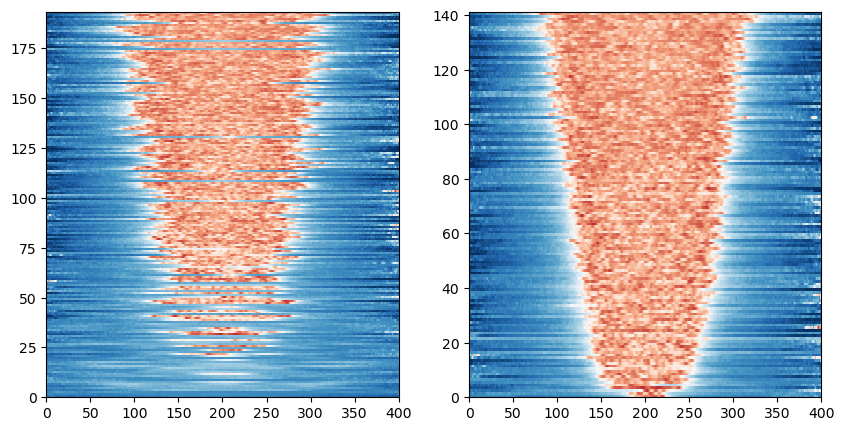

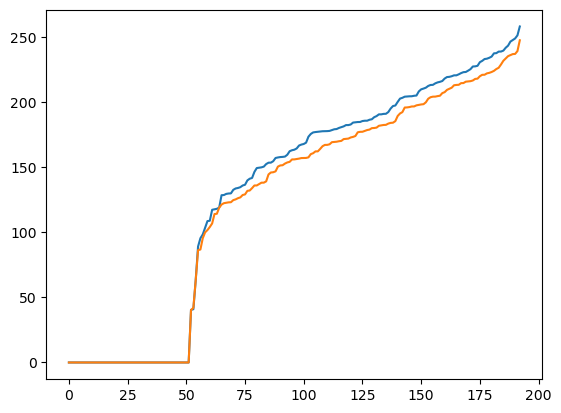

no
no


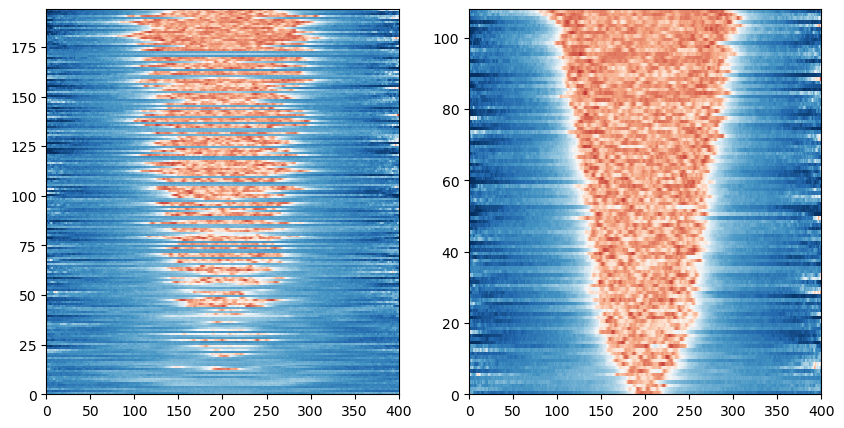

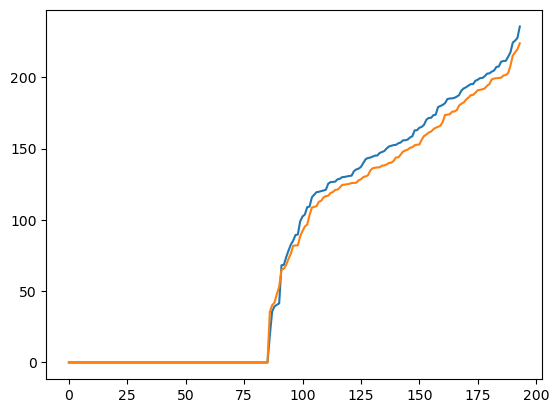

no
no


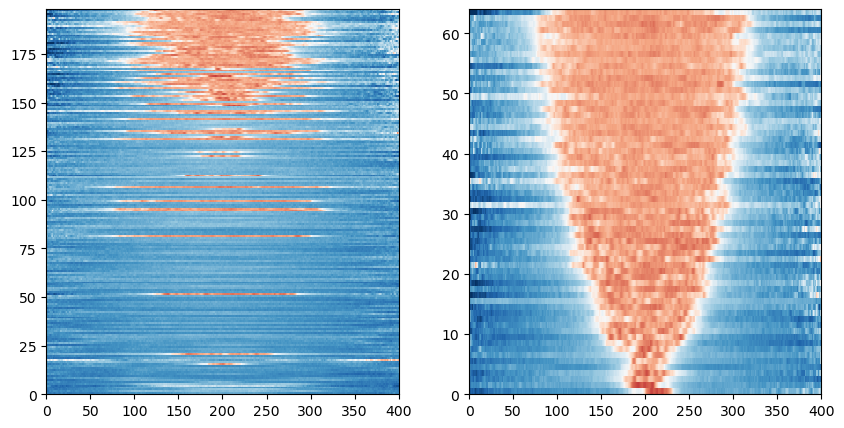

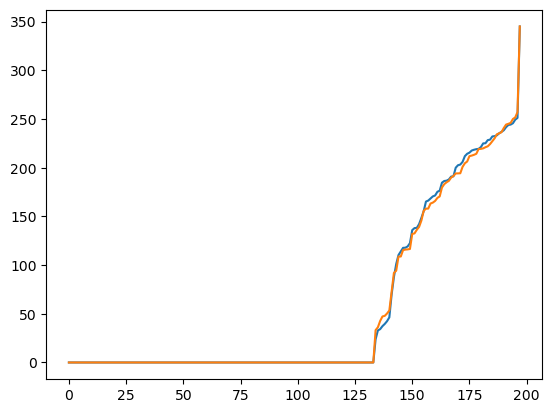

no
no
no
no
no


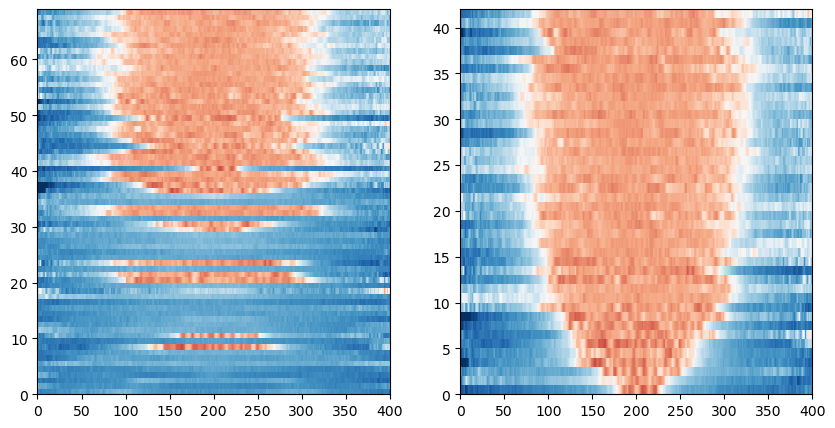

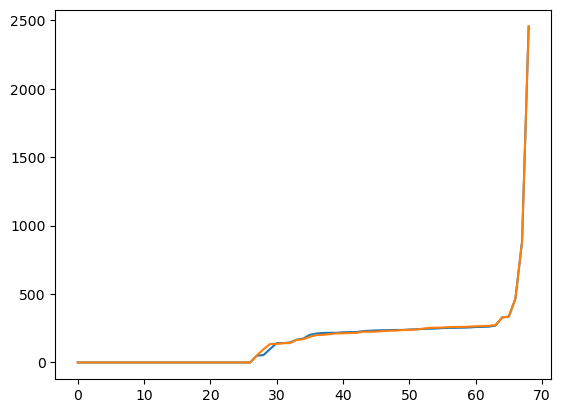

In [88]:
c= 400 #center of the roi
w= 200 #half width of the roi
b_check=20 #half size of the centralregion used to discriminate the bubble
s_size=30 #half size of the region used to fit the shoulder of the bubble
threshold=-0.2 #threshold used to discriminate the bubble
    
#for fs in np.arange(len(knT)): #[0,1,2]:# 
for fs in [0]:
    df12_ = pd.read_hdf(f[fs])
    for ei, ai in enumerate((seqs[fs])):
        m1=[]
        m2=[]
        time=[]
        rep=[]
        
        for ii in ai:
            df12 = df12_[(df12_['sequence_index'].isin([ii]))]
            #print(df12['SRS_V_det2'])
            df12 = df12[(df12[('od_remove_thpart', 'N_bec')]>2e5)]
            df12 = df12[(df12[('od_remove_thpart', 'N_bec')]<2e6)]
            y_axis = 'uW_pulse' # tempo sperimentale di attesa
            df12 = df12.sort_values(y_axis)

            m1=np.append(m1,df12[('od_remove_thpart', 'm1_1d')])
            m2=np.append(m2,df12[('od_remove_thpart', 'm2_1d')])
            rep=np.append(rep,df12[('Repetition')])
            time=np.append(time,df12[('uW_pulse')])

        m1=np.array(m1)
        m2=np.array(m2)
        time=np.array(time)
      
    
        #pulizia da shot strani
        shape = (800, )
        check = type(np.ndarray(1))
        good = np.array([type(p) == check for p in m1])
        goodgood = [p.shape == (800,) for p in m1[good]]
        good[good] = goodgood
        M1 = m1[good]
        M2 = m2[good]
        
        
        roi = np.s_[:, c-w:c+w]
        D = M1+M2*1.3
        M = (M2*1.3-M1)/D
        D = np.vstack(D)[roi]
        M = np.vstack(M)[roi]
        
        # puliza da dati con densita' assurde
        mask_D = ((np.sum(D, axis = 1)>0.1e5) & (np.sum(D, axis = 1)<8e5) & (np.sum(M, axis = 1)<8000))
        time = time[good]
        timeAdvBubble=[]
        D = D[mask_D]
        M = M[mask_D]
        time = np.array(time)[mask_D]
        
        
        b_check_roi = np.s_[:, w-b_check:w+b_check]
        Mb=np.mean(M[b_check_roi],axis=1) #average magnetization in the central 2*b_check pixels
        
        xx=np.arange(2*w)
        bsize=[]
        bsizeADV=[]
        centerB=[]
        times=np.unique(time) 
        MbList=[]

        for i in np.arange(len(Mb)):
            MK=np.mean(M,axis=1)
            LL=w*(-MK+1)/2 #guess of the bubble size from average magnetization on the full roi
            init_vals = [(0.7-Mb[i])/2, w-LL[i], w+LL[i], (0.7+Mb[i])/2 , 3, 3]
            MbList.append(Mb[i])
            if Mb[i]<threshold:
                #plt.plot(np.arange(300),M[i])
                #plt.plot(np.arange(300),bubble(np.arange(300),*init_vals))
                
                #plt.show() 
                try:
                    best_vals, covar = curve_fit(bubble, xx, M[i], p0=init_vals)

                    init_BS_left= [best_vals[0]*.7,best_vals[1],best_vals[3],best_vals[4]]
                    best_BS_left, covar_BS_left = curve_fit(bubbleshoulder, xx[int(round(best_vals[1]))-s_size:int(round(best_vals[1]))+s_size], M[i][int(round(best_vals[1]))-s_size:int(round(best_vals[1]))+s_size], p0=init_BS_left)
                    init_BS_right= [-best_vals[0]*.7,best_vals[2],best_vals[3],best_vals[5]]
                    best_BS_right, covar_BS_right = curve_fit(bubbleshoulder,xx[int(round(best_vals[2]))-s_size:int(round(best_vals[2]))+s_size], M[i][int(round(best_vals[2]))-s_size:int(round(best_vals[2]))+s_size], p0=init_BS_right)
                    centerB.append(int(best_BS_right[1]/2+best_BS_left[1]/2)-150)
                    
                    #plt.plot(np.arange(2*w),M[i])
                    #plt.plot(np.arange(300),bubble(np.arange(300),*init_vals))
                    #plt.plot(np.arange(300),bubbleshoulder(np.arange(300),*init_BS_left))
                    #plt.plot(np.arange(300),bubbleshoulder(np.arange(300),*init_BS_right))
                    #plt.show()
                    
                    bsize.append(best_vals[2]-best_vals[1])
                    bsizeADV.append(best_BS_right[1]-best_BS_left[1])

                except: #gaussian fit if the arctan fit does not work
                    print('no')
                    best_GS, covar_GS = curve_fit(gauss, xx, M[i], p0=[2,w,10,.7])
                    
                    bsize.append(best_GS[2]*2.355)
                    bsizeADV.append(best_GS[2]*2.355)
                    centerB.append(0)
                    
            else: #everything zero if no fits worked
                best_vals=[0,0,0,0,0,0]
                best_BS_left=[0,0,0,0]
                best_BS_right=[0,0,0,0]
                
                bsize.append(0)
                bsizeADV.append(0)
                centerB.append(0)
                
        bsize=np.array(bsize)
        bsizeADV=np.array(bsizeADV) 
        centerB=np.array(centerB) 

        fig, ax = plt.subplots(figsize = (10, 5), ncols=2)
        ax[0].pcolormesh(M, vmin = -1, vmax = +1, cmap = 'RdBu')
        Zlist = np.argsort(bsize)
        Z=(M[Zlist])[np.where(bsize[Zlist]>0)]
        ax[1].pcolormesh(Z, vmin = -1, vmax = +1, cmap = 'RdBu')
        plt.show()
        plt.plot(bsize[np.argsort(bsize)])
        plt.plot(bsizeADV[np.argsort(bsizeADV)])
        #plt.ylim(-10,300)
        plt.show()


In [35]:
x=np.arange(2*w)
y=np.arange(np.shape(np.where(bsize[Zlist]>0))[0])
X, Y = np.meshgrid(x,y)
print(np.shape(np.where(bsize[Zlist]>0))[1])

152
